In [2]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns



In [133]:
end = dt.datetime.now()
start = dt.datetime(end.year - 6,end.month,end.day)
ticker = ['TSLA']

In [134]:
end

datetime.datetime(2024, 5, 6, 14, 23, 19, 415720)

In [100]:
start

datetime.datetime(2018, 5, 6, 0, 0)

In [101]:
tsla = yf.download(ticker, start, end, progress = False)

In [102]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-07,196.000000,197.820007,195.759995,197.059998,197.059998,3692100
2018-05-08,197.399994,197.399994,194.699997,196.240005,196.240005,4189600
2018-05-09,197.000000,200.050003,196.279999,199.869995,199.869995,3290600
2018-05-10,200.429993,201.289993,198.919998,201.199997,201.199997,2957300
2018-05-11,200.619995,202.410004,198.899994,199.300003,199.300003,3917700


In [103]:
tsla =tsla.drop(['Open','High','Low','Close','Volume'], axis = 1)

In [104]:
tsla.head()

,Adj Close
Date,
2018-05-07,197.059998
2018-05-08,196.240005
2018-05-09,199.869995
2018-05-10,201.199997
2018-05-11,199.300003


In [105]:
tsla = tsla.resample("M").last()
tsla.head()

,Adj Close
Date,
2018-05-31,191.529999
2018-06-30,186.649994
2018-07-31,197.869995
2018-08-31,208.720001
2018-09-30,214.110001


In [106]:
tsla['Ret'] = tsla['Adj Close'].pct_change()

tsla

,Adj Close,Ret
Date,,
2018-05-31,191.529999,NaN
2018-06-30,186.649994,-0.025479
2018-07-31,197.869995,0.060113
2018-08-31,208.720001,0.054834
2018-09-30,214.110001,0.025824
...,...,...
2024-01-31,383.739990,0.075927
2024-02-29,409.399994,0.066868
2024-03-31,420.519989,0.027162


In [107]:
tsla.dropna(inplace = True)
tsla

,Adj Close,Ret
Date,,
2018-06-30,186.649994,-0.025479
2018-07-31,197.869995,0.060113
2018-08-31,208.720001,0.054834
2018-09-30,214.110001,0.025824
2018-10-31,205.279999,-0.041240
...,...,...
2024-01-31,383.739990,0.075927
2024-02-29,409.399994,0.066868
2024-03-31,420.519989,0.027162


#### Scarichiamo il risk free dal DB di Fama e French

In [108]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))

In [109]:
ff3_monthly

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...,...
1168,2023-11-30,0.0884,-0.0002,0.0164,0.0044
1169,2023-12-31,0.0487,0.0634,0.0493,0.0043
1170,2024-01-31,0.0071,-0.0509,-0.0238,0.0047
1171,2024-02-29,0.0506,-0.0024,-0.0349,0.0042


In [110]:
ff3_monthly.columns

Index(['date_ff_factors', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')

In [111]:
ff3_monthly.rename({'date_ff_factors': 'Date'}, axis=1, inplace=True)

In [112]:
ff3_monthly.head()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031


In [113]:
ff3_monthly.set_index('Date', inplace = True)

In [114]:
ff3_monthly.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031


#### Combiniamo i DF di FF con quello di Tesla

In [115]:
data = ff3_monthly.merge(tsla, on = 'Date')

In [116]:
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2018-06-30,0.0048,0.0114,-0.0234,0.0014,186.649994,-0.025479
2018-07-31,0.0319,-0.0222,0.0047,0.0016,197.869995,0.060113
2018-08-31,0.0344,0.0114,-0.0394,0.0016,208.720001,0.054834
2018-09-30,0.0006,-0.0227,-0.0170,0.0015,214.110001,0.025824
2018-10-31,-0.0768,-0.0478,0.0340,0.0019,205.279999,-0.041240
...,...,...,...,...,...,...
2023-11-30,0.0884,-0.0002,0.0164,0.0044,360.000000,0.054698
2023-12-31,0.0487,0.0634,0.0493,0.0043,356.660004,-0.009278
2024-01-31,0.0071,-0.0509,-0.0238,0.0047,383.739990,0.075927


In [117]:
data.shape

(70, 6)

In [118]:
data = data.tail(60)
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,216.710007,0.078750
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,197.419998,-0.089013
2019-06-30,0.0693,0.0029,-0.0071,0.0018,213.169998,0.079779
2019-07-31,0.0119,-0.0193,0.0048,0.0019,205.429993,-0.036309
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,203.410004,-0.009833
2019-09-30,0.0143,-0.0096,0.0675,0.0018,208.020004,0.022664
2019-10-31,0.0206,0.0029,-0.0191,0.0016,212.580002,0.021921
2019-11-30,0.0387,0.0077,-0.0202,0.0012,220.300003,0.036316
2019-12-31,0.0277,0.0073,0.0175,0.0014,226.500000,0.028143


#### Calcoliamo il beta di TESLA

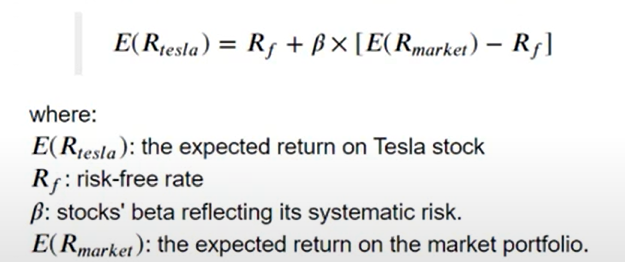

In [119]:
TSLA_excess_ret = data['Ret'] - data['RF']

In [120]:
data['TSLA-RF'] = TSLA_excess_ret

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_2064\2753428387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSLA-RF'] = TSLA_excess_ret


In [121]:
data.head()

,Mkt-RF,SMB,HML,RF,Adj Close,Ret,TSLA-RF
Date,,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,216.710007,0.078750,0.076650
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,197.419998,-0.089013,-0.091113
2019-06-30,0.0693,0.0029,-0.0071,0.0018,213.169998,0.079779,0.077979
2019-07-31,0.0119,-0.0193,0.0048,0.0019,205.429993,-0.036309,-0.038209
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,203.410004,-0.009833,-0.011433


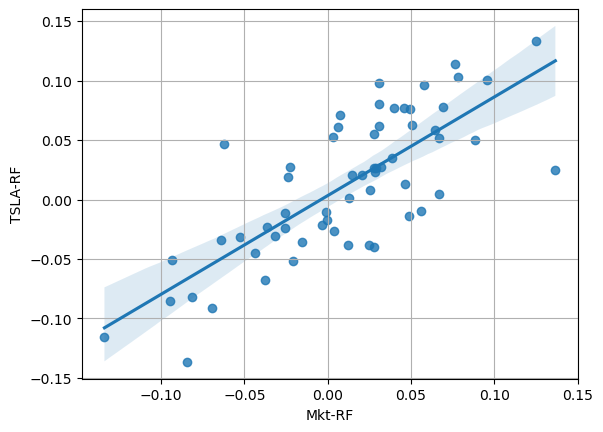

In [122]:
sns.regplot(x = 'Mkt-RF', y='TSLA-RF', data = data)
plt.grid()

In [123]:
X = data['Mkt-RF']
y = data['TSLA-RF']
X1 = sm.add_constant(X)

In [124]:
model = sm.OLS(y,X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     82.95
Date:                Mon, 06 May 2024   Prob (F-statistic):           8.82e-13
Time:                        14:22:02   Log-Likelihood:                 111.30
No. Observations:                  60   AIC:                            -218.6
Df Residuals:                      58   BIC:                            -214.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.005      0.648      0.520      -0.007       0.013
Mkt-RF         0.8302      0.091      9.107      0.000       0.648       1.013
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.171
Skew:                          -0.055   Prob(JB):                        0.918
Kurtosis:                       2.763   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
intercept, beta = results.params

In [126]:
intercept

0.0032870337699901666

In [127]:
beta

0.8302457916657704

#### Calcoliamo il rendimento atteso di TESLA

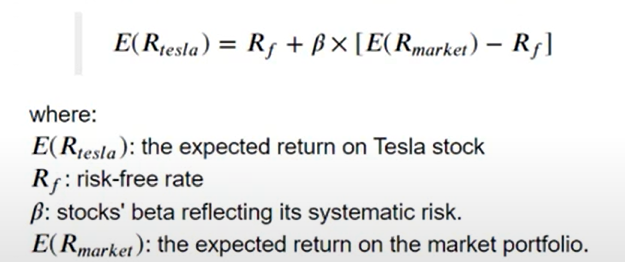

In [128]:
# Per il risk free prendiamo il tasso a breve corrente non quello passato. 5% diviso 12 pari a 0,417%
risk_free = 0.00417

In [129]:
# Per il mercato possiamo prendere o la nostra stima o una media di lungo periodo. Ipotizziamo 7% diviso 12 pari a 0,5%
market_premium = 0.0058

In [130]:
# Se prendiamo la media recente viene un numero altissimo
data['Mkt-RF'].mean()*12

0.13357999999999995

In [131]:
# Rendimento atteso di TESLA
TESLA_exp_ret = risk_free + beta*market_premium
TESLA_exp_ret


0.008985425591661468

In [132]:
TESLA_exp_ret_y = TESLA_exp_ret * 12
TESLA_exp_ret_y

0.10782510709993762